In [11]:
import cv2 #computer vision pack
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

In [2]:
cifar = tf. keras.datasets.cifar10 #call to the dataset

In [3]:
#Returns Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

(x_train,y_train), (x_test, y_test) = cifar.load_data() #split the dataset

In [4]:
print(f"The shape of x_train: {x_train.shape}")
print(f"The shape of y_train: {y_train.shape} \n")

print(f"The shape of x_test: {x_test.shape}")
print(f"The shape of y_test: {y_test.shape}")

The shape of x_train: (50000, 32, 32, 3)
The shape of y_train: (50000, 1) 

The shape of x_test: (10000, 32, 32, 3)
The shape of y_test: (10000, 1)


In [5]:
#normalize the data

x_train = tf.keras.utils.normalize(x_train, axis= 1)
x_test = tf.keras.utils.normalize(x_test, axis= 1)

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Flatten(input_shape=(32,32,3))) #Flatten each input of 32*32*3 as a simple vector

model1.add(tf.keras.layers.Dense(10, activation = "softmax"))

model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

#model1.fit(x_train,y_train, epochs = 3)

model1.save("cifar1.model")

In [8]:
#definition of the model

model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Flatten(input_shape=(32,32,3))) #Flatten each input of 32*32*3 as a simple vector
model1.add(tf.keras.layers.Dense(10, activation = "softmax"))
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

model1.save("model1")

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


In [10]:
indices = np.random.choice(x_train.shape[0], 5, replace=False)

# Use these indices to create a new array such that only have the selected samples from the entire dataset
x_train_df = x_train[indices] #This is the data I will use to train the model

print(x_train_df.shape[0])

5


In [44]:
num_data= [20,60,100,1000,2000,3800,5000,8000,10000]


# Load your model
loaded_model1 = tf.keras.models.load_model('model1')

num_samples=[]
e_out=[]
e_in=[]



epoch = 20


for n in num_data:
    trial_in = [] #For every value of n I need to repeat the experiment 5 times so I will save those experiment results here
    trial_out = []
    num_samples.append(n)

    if n<=20:
        batch = x_train_df.shape[0]
    elif n<=100:
        batch = 32
    else:
        batch = 64

    for j in range(4):
        #Select n random indices from 0 to x_train.shape[0] 
        indices = np.random.choice(x_train.shape[0], n, replace=False)

        # Use these indices to create a new array such that only have the selected samples from the entire dataset
        x_train_df = x_train[indices] #This is the data I will use to train the model
        y_train_df = y_train[indices] #This are the classes of the selected samples

        validation_indexes = np.random.choice(x_train.shape[0], math.floor(n*.20), replace=False)
        validation_x = x_train[validation_indexes]
        validation_y = y_train[validation_indexes]

        #Let's fit the model
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2) #this will stop if the model is no longer learning
        loaded_model1.fit(x_train_df, y_train_df, batch_size = batch, epochs = epoch, validation_data=(validation_x, validation_y), callbacks=[early_stopping] ) #fit the model

        loss_in , acuracy_in = loaded_model1.evaluate(x_train_df,y_train_df) #check in sample error
        loss_out , acuracy_out = loaded_model1.evaluate(x_test,y_test) #check out sample error

        trial_in.append(loss_in)
        trial_out.append(loss_out)

    
    e_out.append(trial_out)
    e_in.append(trial_in)


medians_out = [np.median(trial) for trial in e_out]
variances_out = [np.var(trial) for trial in e_out]

medians_in = [np.median(trial) for trial in e_in]
variances_in = [np.var(trial) for trial in e_in]

#We need to use the standard deviation, because the units of the variance are the ones of the medians but squared
std_devs_in = [np.sqrt(variance) for variance in variances_in]
std_devs_out = [np.sqrt(variance) for variance in variances_out]

Epoch 1/20
1/1 [==============================] - 0s 382ms/step - loss: 2.3139 - accuracy: 0.2500 - val_loss: 2.2962 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 19ms/step - loss: 2.0831 - accuracy: 0.0000e+00 - val_loss: 2.2854 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 21ms/step - loss: 1.9511 - accuracy: 0.0000e+00 - val_loss: 2.3626 - val_accuracy: 0.0000e+00
Epoch 4/20
313/313 [==============================] - 0s 1ms/step - loss: 2.7430 - accuracy: 0.0000e+00
Epoch 1/20
1/1 [==============================] - 0s 57ms/step - loss: 2.2763 - accuracy: 0.0000e+00 - val_loss: 2.7239 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 17ms/step - loss: 2.1834 - accuracy: 0.0000e+00 - val_loss: 2.8294 - val_accuracy: 0.0000e+00
Epoch 3/20
313/313 [==============================] - 0s 1ms/step - loss: 2.7317 - accuracy: 0.0000e+00
Epoch 1/20
1/1 [==============================] - 0s 49ms/st

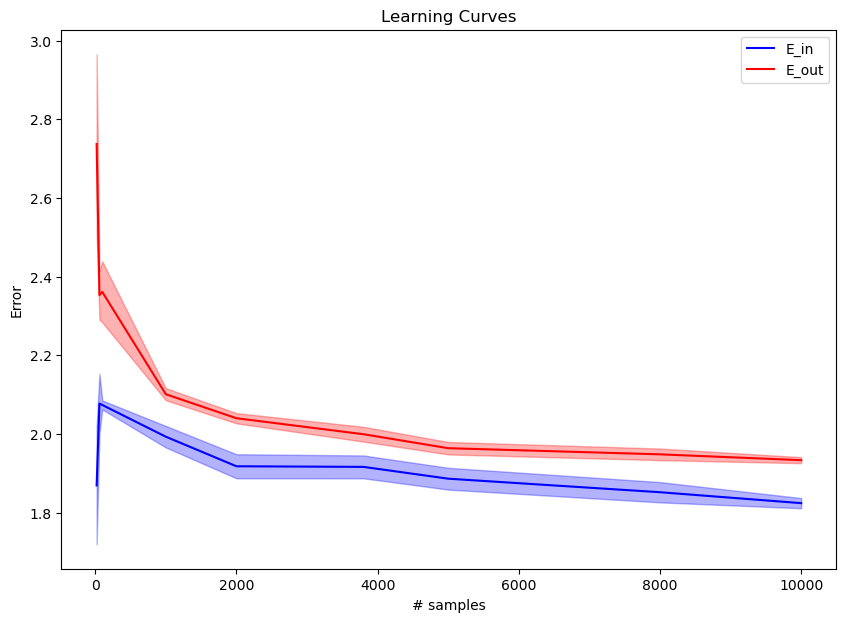

In [64]:
plt.figure(figsize=(10,7))  

plt.plot(num_samples, medians_in, color='blue', label='E_in')

# Plotting the variance as color shadow
plt.fill_between(num_samples, 
                 [median - std_dev for median, std_dev in zip(medians_in, std_devs_in)], 
                 [median + std_dev for median, std_dev in zip(medians_in, std_devs_in)], 
                 color='blue', alpha=0.3)


plt.plot(num_samples, medians_out, color='red', label='E_out')

plt.fill_between(num_samples, 
                 [median - std_dev for median, std_dev in zip(medians_out, std_devs_out)], 
                 [median + std_dev for median, std_dev in zip(medians_out, std_devs_out)], 
                 color='red', alpha=0.3)


plt.xlabel('# samples')
plt.ylabel('Error')
plt.title('Learning Curves')
plt.legend()

plt.show()